In [1]:
import numpy 
from matplotlib import pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [46]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.image as image 
import os 
import time as time
import numpy as np


In [2]:
width = 2

In [3]:
nx = 41
ny = 41
nt = 500
nit = 50
c = 1
dx = width / (nx - 1)
dy = width / (ny - 1)
x = numpy.linspace(0, width, nx)
y = numpy.linspace(0, width, ny)
X, Y = numpy.meshgrid(x, y)

rho = 1
nu = .1
dt = .001

u = numpy.zeros((ny, nx))
v = numpy.zeros((ny, nx))
p = numpy.zeros((ny, nx)) 
b = numpy.zeros((ny, nx))

In [10]:
def build_up_b(b, rho, dt, u, v, dx, dy):
    
    b[1:-1, 1:-1] = (rho * (1 / dt * 
                    ((u[1:-1, 2:] - u[1:-1, 0:-2]) / 
                     (2 * dx) + (v[2:, 1:-1] - v[0:-2, 1:-1]) / (2 * dy)) -
                    ((u[1:-1, 2:] - u[1:-1, 0:-2]) / (2 * dx))**2 -
                      2 * ((u[2:, 1:-1] - u[0:-2, 1:-1]) / (2 * dy) *
                           (v[1:-1, 2:] - v[1:-1, 0:-2]) / (2 * dx))-
                          ((v[2:, 1:-1] - v[0:-2, 1:-1]) / (2 * dy))**2))

    return b

In [11]:
def pressure_poisson(p, dx, dy, b):
    pn = numpy.empty_like(p)
    pn = p.copy()
    
    for q in range(nit):
        pn = p.copy()
        p[1:-1, 1:-1] = (((pn[1:-1, 2:] + pn[1:-1, 0:-2]) * dy**2 + 
                          (pn[2:, 1:-1] + pn[0:-2, 1:-1]) * dx**2) /
                          (2 * (dx**2 + dy**2)) -
                          dx**2 * dy**2 / (2 * (dx**2 + dy**2)) * 
                          b[1:-1,1:-1])

        p[:, -1] = p[:, -2] # dp/dx = 0 at x = 2
        p[0, :] = p[1, :]   # dp/dy = 0 at y = 0 --- This follows the idea that if the gradient is zero, then value at x and x+1 should be the same. very clever 
        p[-1, :] = 0        # p = 0 at y = 2
        p[:, 0] = 1         # p = 1 at x = 0 
        
    return p

In [14]:
def cavity_flow(nt, u, v, dt, dx, dy, p, rho, nu):
    un = numpy.empty_like(u)
    vn = numpy.empty_like(v)
    b = numpy.zeros((ny, nx))
    
    for n in range(nt):
        un = u.copy()
        vn = v.copy()
        
        b = build_up_b(b, rho, dt, u, v, dx, dy)
        p = pressure_poisson(p, dx, dy, b)
        
        u[1:-1, 1:-1] = (un[1:-1, 1:-1]-
                         un[1:-1, 1:-1] * dt / dx *
                        (un[1:-1, 1:-1] - un[1:-1, 0:-2]) -
                         vn[1:-1, 1:-1] * dt / dy *
                        (un[1:-1, 1:-1] - un[0:-2, 1:-1]) -
                         dt / (2 * rho * dx) * (p[1:-1, 2:] - p[1:-1, 0:-2]) +
                         nu * (dt / dx**2 *
                        (un[1:-1, 2:] - 2 * un[1:-1, 1:-1] + un[1:-1, 0:-2]) +
                         dt / dy**2 *
                        (un[2:, 1:-1] - 2 * un[1:-1, 1:-1] + un[0:-2, 1:-1])))

        v[1:-1,1:-1] = (vn[1:-1, 1:-1] -
                        un[1:-1, 1:-1] * dt / dx *
                       (vn[1:-1, 1:-1] - vn[1:-1, 0:-2]) -
                        vn[1:-1, 1:-1] * dt / dy *
                       (vn[1:-1, 1:-1] - vn[0:-2, 1:-1]) -
                        dt / (2 * rho * dy) * (p[2:, 1:-1] - p[0:-2, 1:-1]) +
                        nu * (dt / dx**2 *
                       (vn[1:-1, 2:] - 2 * vn[1:-1, 1:-1] + vn[1:-1, 0:-2]) +
                        dt / dy**2 *
                       (vn[2:, 1:-1] - 2 * vn[1:-1, 1:-1] + vn[0:-2, 1:-1])))

        u[0, :]  = 0
        u[:, 0]  = 0
        u[:, -1] = 0
        u[-1, :] = 0    # set velocity on cavity lid equal to 1
        v[0, :]  = 0
        v[-1, :] = 0
        v[:, 0]  = 0
        v[:, -1] = 0
        
        u[0:1] = 1
        v[0:1] = 1
                
    return u, v, p

In [26]:
def sqaure_frame_calculator(u,v,n=1):

        result = u**2 + v**2 
        fig = plt.figure(figsize=(11,7), dpi=100)
# plotting the pressure field as a contour
        plt.contourf(X, Y, result, alpha=0.6, cmap=cm.viridis)  
        plt.colorbar()
# plotting the pressure field outlines
        plt.contour(X, Y, result, cmap=cm.viridis)  
# plotting velocity field
        # plt.quiver(X[::3, ::3], Y[::3, ::3], u[::3, ::3], v[::3, ::3]) 
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.savefig(f'./sqaure-frames/step-{n}.png')
        plt.close(fig)

In [38]:
def sqaure_root_frame_calculator(u,v,n=1):

        result =  numpy.sqrt(u**2 + v**2) 
        fig = plt.figure(figsize=(11,7), dpi=100)
# plotting the pressure field as a contour
        plt.contourf(X, Y, result, alpha=0.6, cmap=cm.coolwarm)  
        plt.colorbar()
# plotting the pressure field outlines
        plt.contour(X, Y, result, cmap=cm.viridis)  
# plotting velocity field
        # plt.quiver(X[::3, ::3], Y[::3, ::3], u[::3, ::3], v[::3, ::3]) 
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.savefig(f'./sqrt-frames/step-{n}.png')
        plt.close(fig)

In [28]:
sqaure_root_frame_calculator(u,v)

In [45]:
def l2_norm_matrix(matrix):
    """
    Calculates the L2 norm (spectral norm) of a matrix using NumPy.

    Args:
        matrix: A NumPy 2D array (matrix).

    Returns:
        The L2 norm of the matrix (a scalar).  Returns NaN if the input is not a 2D array or if an error occurs during SVD.
    """
    try:
        if matrix.ndim != 2:
            return np.nan  # Or raise a ValueError: "Input must be a 2D array."

        U, S, V = np.linalg.svd(matrix)  # Perform Singular Value Decomposition

        # S is a 1D array containing the singular values.  They are already sorted in descending order.
        largest_singular_value = S[0]

        return largest_singular_value

    except np.linalg.LinAlgError:  # Handle potential SVD errors (e.g., matrix doesn't converge)
        return np.nan # Or raise the exception if you prefer.
    except TypeError: # Handle cases where the input is not a numpy array.
        return np.nan

In [47]:
def get_l2(u,v):
    result =  numpy.sqrt(u**2 + v**2)
    
    r = l2_norm_matrix(result)

    if r is not np.nan:
        return r
    else:
        return np.inf

In [51]:
## simple simulation with varying number of nozzles 
def cavity_flow(nt, u, v, dt, dx, dy, p, rho, nu,numNoz = 5,nozzle_vel=1):
    un = numpy.empty_like(u)
    vn = numpy.empty_like(v)
    b = numpy.zeros((ny, nx))
    

#     for i in range(1,nx,int(nx/numNoz)):
#             print(i)
#             u[i:0] = 10
#             v[i:0] = 20
#             u[i:ny] = 30
#             v[i:ny] = 40
#             u[0:i]=50
#             v[0:i]=60
#             u[nx:i]=70
#             v[nx:i]=80
    for n in range(nt):
        un = u.copy()
        vn = v.copy()
        
        b = build_up_b(b, rho, dt, u, v, dx, dy)
        p = pressure_poisson(p, dx, dy, b)
        
        u[1:-1, 1:-1] = (un[1:-1, 1:-1]-
                         un[1:-1, 1:-1] * dt / dx *
                        (un[1:-1, 1:-1] - un[1:-1, 0:-2]) -
                         vn[1:-1, 1:-1] * dt / dy *
                        (un[1:-1, 1:-1] - un[0:-2, 1:-1]) -
                         dt / (2 * rho * dx) * (p[1:-1, 2:] - p[1:-1, 0:-2]) +
                         nu * (dt / dx**2 *
                        (un[1:-1, 2:] - 2 * un[1:-1, 1:-1] + un[1:-1, 0:-2]) +
                         dt / dy**2 *
                        (un[2:, 1:-1] - 2 * un[1:-1, 1:-1] + un[0:-2, 1:-1])))

        v[1:-1,1:-1] = (vn[1:-1, 1:-1] -
                        un[1:-1, 1:-1] * dt / dx *
                       (vn[1:-1, 1:-1] - vn[1:-1, 0:-2]) -
                        vn[1:-1, 1:-1] * dt / dy *
                       (vn[1:-1, 1:-1] - vn[0:-2, 1:-1]) -
                        dt / (2 * rho * dy) * (p[2:, 1:-1] - p[0:-2, 1:-1]) +
                        nu * (dt / dx**2 *
                       (vn[1:-1, 2:] - 2 * vn[1:-1, 1:-1] + vn[1:-1, 0:-2]) +
                        dt / dy**2 *
                       (vn[2:, 1:-1] - 2 * vn[1:-1, 1:-1] + vn[0:-2, 1:-1])))

        ## velcoity of boundary walls 
        u[0, :]  = 0
        u[:, 0]  = 0
        u[:, -1] = 0
        u[-1, :] = 0    
        v[0, :]  = 0
        v[-1, :] = 0
        v[:, 0]  = 0
        v[:, -1] = 0

        
        for i in range(1,nx,int(nx/numNoz)):
            u[i:0] = nozzle_vel
            v[i:0] = nozzle_vel
            u[i:ny] = nozzle_vel
            v[i:ny] = nozzle_vel
            u[0:i]=nozzle_vel
            v[0:i]=nozzle_vel
            u[nx:i]=nozzle_vel
            v[nx:i]=nozzle_vel


        # inherent bug - it will show nozzle velocity points in the interiors also - but for now lets see which all points behave like that 

        fig = plt.figure(figsize=(11,7), dpi=100)
# plotting the pressure field as a contour
        plt.contourf(X, Y, p, alpha=0.6, cmap=cm.coolwarm)  
        plt.colorbar()
# plotting the pressure field outlines
        plt.contour(X, Y, p, cmap=cm.viridis)  
# plotting velocity field
        plt.quiver(X[::3, ::3], Y[::3, ::3], u[::3, ::3], v[::3, ::3]) 
        # plt.scatter(X[nozzle_indices_x], Y[nozzle_indices_y], c='red', marker='o', label='Nozzle') # Plot circles
        plt.title(f'number of nozzles on each face : {numNoz}')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.savefig(f'./frames/step-{n}.png')
        plt.close(fig)

        sqaure_frame_calculator(u,v,n)
        sqaure_root_frame_calculator(u,v,n)


    
    return u, v, p

In [32]:
def create_gif(image_dir,show=False,tag='random-gif'):
    image_files = sorted([f for f in os.listdir(image_dir) if f.endswith(('.png', '.jpg', '.jpeg'))]) # Get sorted list of image files

    fig, ax = plt.subplots()
    ims = []

    for image_file in image_files:
        img_path = os.path.join(image_dir, image_file) 
        img = image.imread(img_path) 
        im = ax.imshow(img, animated=True) 
        ims.append([im])

    ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
    
    if show:
        plt.show()

    T_stamp = time.time()
    # To save the animation to a GIF file (requires PillowWriter)
    ani.save(f'{tag}-{T_stamp}.gif', writer=animation.PillowWriter(fps=30))


In [33]:
def create_mp4(image_dir,show=False,tag='random-gif',fps=30):
    image_files = sorted([f for f in os.listdir(image_dir) if f.endswith(('.png', '.jpg', '.jpeg'))]) # Get sorted list of image files

    fig, ax = plt.subplots()
    ims = []

    for image_file in image_files:
        img_path = os.path.join(image_dir, image_file) 
        img = image.imread(img_path) 
        im = ax.imshow(img, animated=True) 
        ims.append([im])

    ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
    
    if show:
        plt.show()

    T_stamp = time.time()
    # To save the animation to a GIF file (requires PillowWriter)
    ani.save(f'{tag}-{T_stamp}.mp4', writer='ffmpeg', fps=fps)

In [44]:
u = numpy.zeros((ny, nx))
v = numpy.zeros((ny, nx))
p = numpy.zeros((ny, nx))
b = numpy.zeros((ny, nx))
nt = 2
u, v, p = cavity_flow(nt, u, v, dt, dx, dy, p, rho, nu)
# create_gif(image_dir='./frames/',show=False,tag='vel-pressure')
# create_gif(image_dir='./sqaure-frames/',show=False,tag='sqaure-frame')
# create_gif(image_dir='./sqrt-frames/',show=False,tag='sqrt-frame')

AttributeError: 'numpy.ndarray' object has no attribute 'index'

Lowest L2 point at time 1739999233.9663138 and nozzle def : 1 = 579.8275605729691


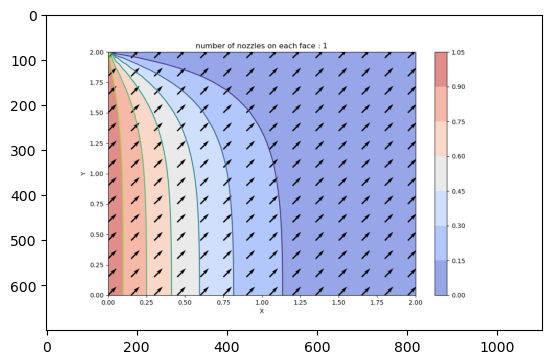

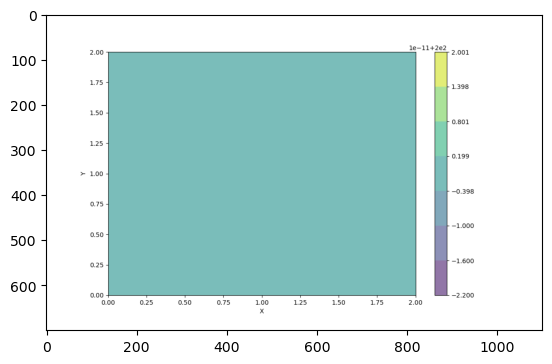

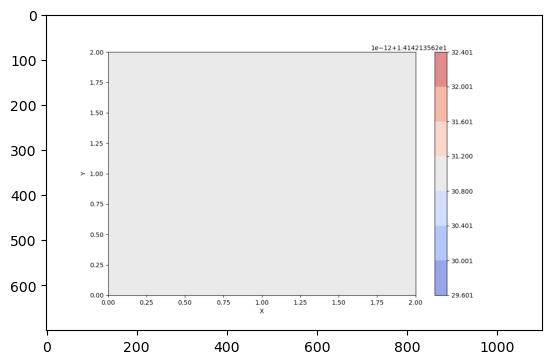

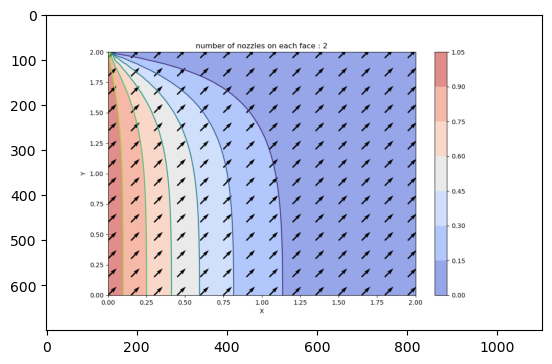

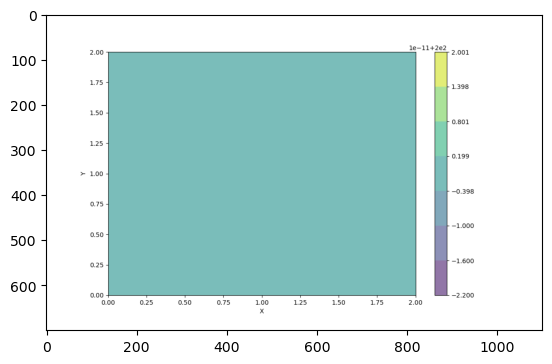

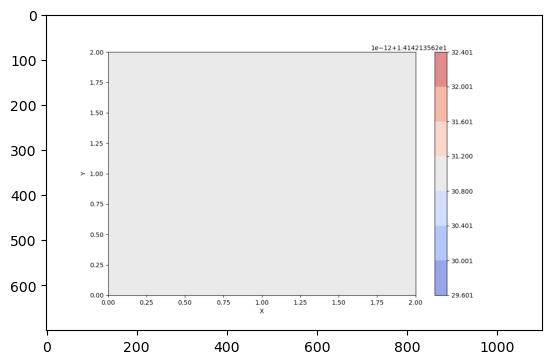

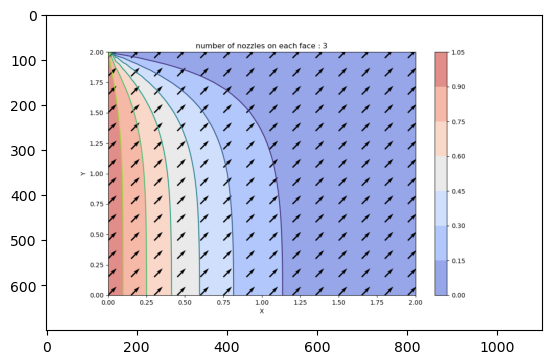

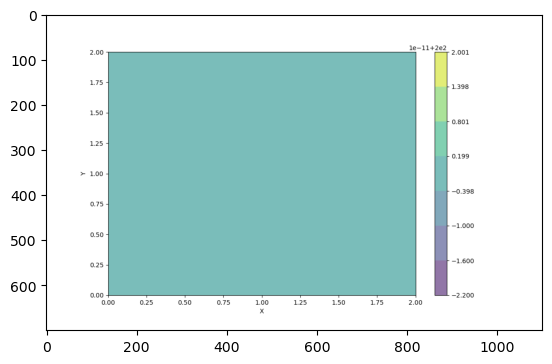

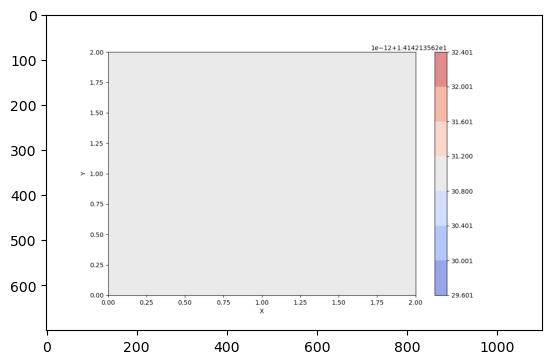

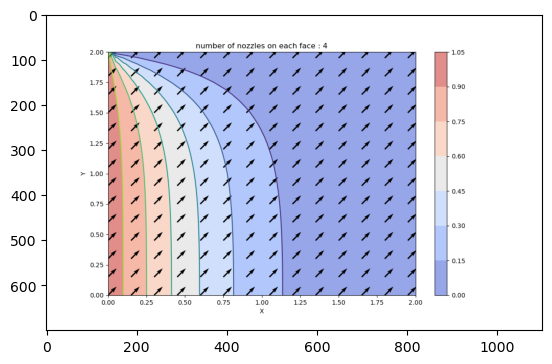

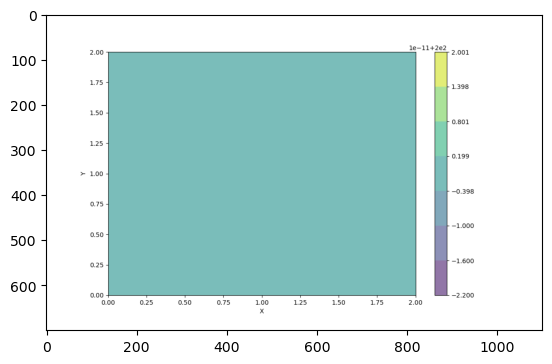

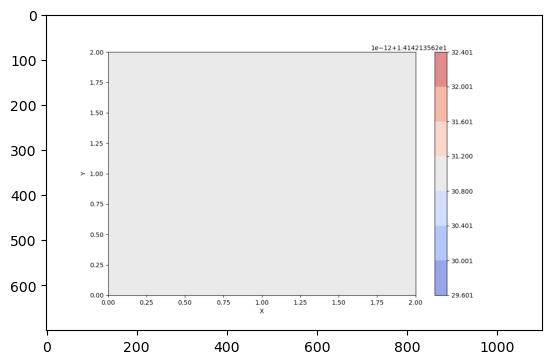

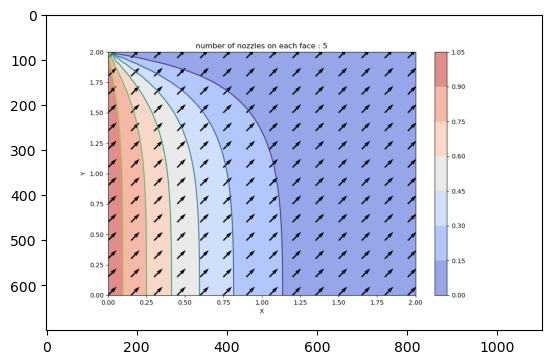

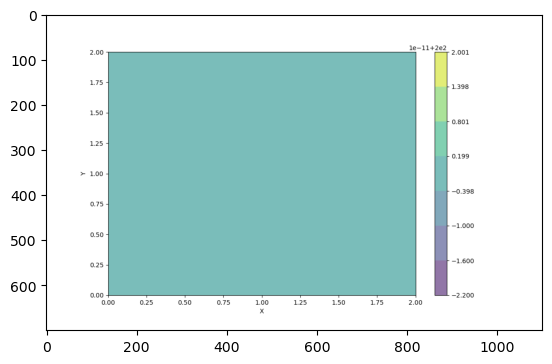

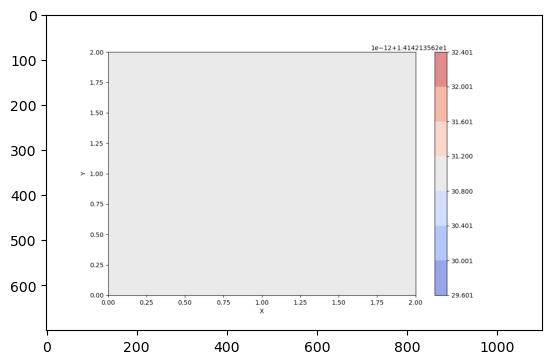

In [59]:
min_l2 = np.inf
min_u = np.empty_like(u)
min_v = np.empty_like(v)
p_at_uv = np.empty_like(p)

nozzle_velocity = 10
nozzle_count_range = 5
for i in range(1,nozzle_count_range+1):
    u = numpy.zeros((ny, nx))
    v = numpy.zeros((ny, nx))
    p = numpy.zeros((ny, nx))
    b = numpy.zeros((ny, nx))
    nt = 50
    u, v, p  = cavity_flow(nt, u, v, dt, dx, dy, p, rho, nu,numNoz=i,nozzle_vel=nozzle_velocity)
    create_gif(image_dir='./frames/',show=False,tag=f'vel-pressure-nozz-{i}')
    create_gif(image_dir='./sqaure-frames/',show=False,tag=f'sqaure-frame-nozz-{i}')
    create_gif(image_dir='./sqrt-frames/',show=False,tag=f'sqrt-frame-nozz-{i}')
    l2 = get_l2(u,v)
    if min_l2 > l2:
        min_l2=l2
        min_u = u.copy()
        min_v = v.copy()
        p_at_uv = p.copy()
        nozval_low = i 
        print(f'Lowest L2 point at time {time.time()} and nozzle def : {i} =',min_l2)



In [58]:
print(f'Lowest L2 point at time {time.time()} and nozzle def : {nozval_low} =',min_l2)

Lowest L2 point at time 1739999100.0503929 and nozzle def : 2 = 579.8275605729691
